In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_parquet('/Users/harshitgupta/Desktop/vs /VS-Data-Den/graphs/parquet_dataset.parquet')

In [3]:
df.head()

DATE_FIELD  SALES  WEEK  PTNR_RM_CODE      FLAG
PTNR_RM_CODE                                                        
0.0          9224474 2020-10-03   0.00    35           0.0  inactive
             9211636 2020-10-03   0.00    35           0.0  inactive
             9203627 2020-10-03   2.67    35           0.0    active
             9235694 2020-10-03   3.85    35           0.0    active
             9203626 2020-10-03  10.11    35           0.0    active

In [4]:
# df['YEARWEEK'] = df['YEARWEEK'].astype(str)
# df['YEARWEEK'] = pd.to_datetime(df['YEARWEEK'].astype(str) + '-0', format='%Y%W-%w')

In [4]:
df.head()

DATE_FIELD  SALES  WEEK  PTNR_RM_CODE      FLAG
PTNR_RM_CODE                                                        
0.0          9224474 2020-10-03   0.00    35           0.0  inactive
             9211636 2020-10-03   0.00    35           0.0  inactive
             9203627 2020-10-03   2.67    35           0.0    active
             9235694 2020-10-03   3.85    35           0.0    active
             9203626 2020-10-03  10.11    35           0.0    active

In [6]:
df.set_index('DATE_FIELD' , inplace=True)

In [7]:
df.head()

,SALES,WEEK,PTNR_RM_CODE,FLAG
DATE_FIELD,,,,
2020-10-03,0.00,35,0.0,inactive
2020-10-03,0.00,35,0.0,inactive
2020-10-03,2.67,35,0.0,active
2020-10-03,3.85,35,0.0,active
2020-10-03,10.11,35,0.0,active


In [8]:
df.describe()

,SALES,WEEK,PTNR_RM_CODE
count,9.713572e+06,9.713572e+06,9.713572e+06
mean,3.281459e+01,2.853135e+01,2.778458e+07
std,4.278503e+02,1.539693e+01,2.484452e+07
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,8.870000e+00,1.600000e+01,0.000000e+00
50%,1.579000e+01,3.200000e+01,5.000001e+07
75%,3.180000e+01,4.000000e+01,5.000008e+07
max,4.945912e+05,5.200000e+01,5.000114e+07


In [9]:
df.count()

TOTAL_SALES    325
dtype: int64

<Axes: xlabel='DATE_FIELD'>

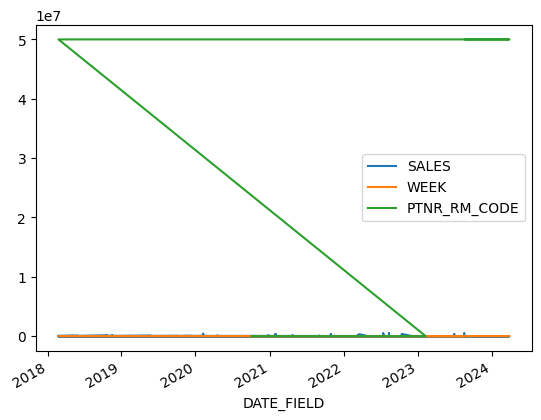

In [9]:
df.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result = adfuller(df['TOTAL_SALES'])

In [13]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF test stat',  'p-value' , 'no of lags used' , 'no of obs']
    for value,label in zip(result,labels):
        print(label+' : ' + str(value))
    if result[1]<=0.05:
        print('strong evidence against null hypothesis')
    else:
        print('weak evidenece against null hypothesis')

In [14]:
adfuller_test(df['TOTAL_SALES'])

ADF test stat : -14.42914691449927
p-value : 7.682256216128759e-27
no of lags used : 0
no of obs : 324
strong evidence against null hypothesis


In [15]:
import statsmodels.api as sm

In [16]:
train = df.iloc[:int(0.6*len(df))]
test = df.iloc[int(0.6*len(df)):]


In [17]:
train.count() , test.count()

(TOTAL_SALES    195
 dtype: int64,
 TOTAL_SALES    130
 dtype: int64)

In [18]:
import itertools

In [40]:
# Define the parameter combinations
p_values = range(0, 5)  # Autoregressive order
d_values = range(0.5)          # Differencing order
q_values = range(0, 5)  # Moving average order
P_values = range(0, 5)  # Seasonal autoregressive order
D_values = range(0, 5)  # Seasonal differencing order
Q_values = range(0, 5)  # Seasonal moving average order
m_values = [1,3,12,52]         # Seasonal period

# Create all possible combinations of SARIMA parameters
param_combinations = list(itertools.product(p_values, 
                                            d_values, 
                                            q_values, 
                                            P_values, 
                                            D_values, 
                                            Q_values, 
                                            m_values))



In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
best_mape = float('inf')
best_params_mape = None

In [ ]:
for param in param_combinations:
    for trend_param in ['n', 'c', 't', 'ct', [1, 1, 0, 1]]:
        try:
            # Fit SARIMA model
            model = sm.tsa.statespace.SARIMAX(train['TOTAL_SALES'], 
                                               order=(param[0], param[1], param[2]), 
                                               seasonal_order=(param[3], param[4], param[5], param[6]),
                                               trend=trend_param)
            results = model.fit()

            # Forecast
            forecast = results.forecast(steps=len(test))

            # Calculate MAPE
            mape_val = mape(test['TOTAL_SALES'], forecast)

            # Update best parameters if MAPE is lower
            if mape_val < best_mape:
                best_mape = mape_val
                best_params_mape = (param, trend_param)
        except:
            continue

In [59]:
print("Best Parameters with Least MAPE:", best_params_mape)
print("Best MAPE:", best_mape)

Best Parameters with Least MAPE: ((0, 0, 0, 0, 0, 1, 52), 'ct')
Best MAPE: 29.82405531744574


In [47]:
forecast = results.forecast(steps=len(test))

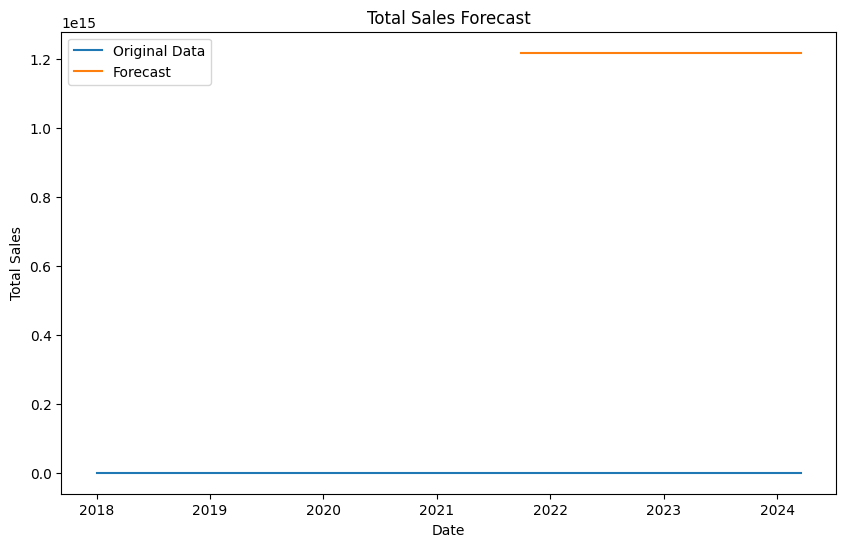

Forecasted Sales:
2021-09-27    1.217683e+15
2021-10-04    1.217683e+15
2021-10-11    1.217683e+15
2021-10-18    1.217683e+15
2021-10-25    1.217683e+15
                  ...     
2024-02-19    1.217683e+15
2024-02-26    1.217683e+15
2024-03-04    1.217683e+15
2024-03-11    1.217683e+15
2024-03-18    1.217683e+15
Freq: W-MON, Name: predicted_mean, Length: 130, dtype: float64


In [48]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['TOTAL_SALES'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast')
plt.title('Total Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


print("Forecasted Sales:")
print(forecast)

In [49]:
import numpy as np
from sklearn.metrics import mean_squared_error


In [50]:
rmse = np.sqrt(mean_squared_error(test['TOTAL_SALES'], forecast))

In [51]:
rmse

1217682902399968.2

In [52]:
# test.head(10)

In [53]:
test['prediction'] = results.predict(dynamic=True)

/var/folders/_p/ljb0l43112vc95swz8nhgv340000gn/T/ipykernel_44468/2851741147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = results.predict(dynamic=True)


In [54]:
test.head(10)

,TOTAL_SALES,prediction
YEARWEEK,,
2021-09-27,835136,NaN
2021-10-04,4765110,NaN
2021-10-11,1326006,NaN
2021-10-18,1013609,NaN
2021-10-25,1711620,NaN
2021-11-01,1294929,NaN
2021-11-08,817435,NaN
2021-11-15,809694,NaN
2021-11-22,1054434,NaN


In [55]:
# df[['TOTAL_SALES' , 'prediction']].plot(figsize=(12,8))

In [56]:
df.tail()

,TOTAL_SALES
YEARWEEK,
2024-02-19,640202
2024-02-26,1060437
2024-03-04,1247705
2024-03-11,1042492
2024-03-18,120695


In [57]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [58]:
mape_value = mape(test['TOTAL_SALES'], forecast)
print("MAPE:", mape_value)

MAPE: 128902968483.42688
